In [1]:
import timm
import torch
import matplotlib.pyplot as plt

import sys
sys.path.append("../")

from utils.train_util import CosineAnnealingWarmUpRestarts

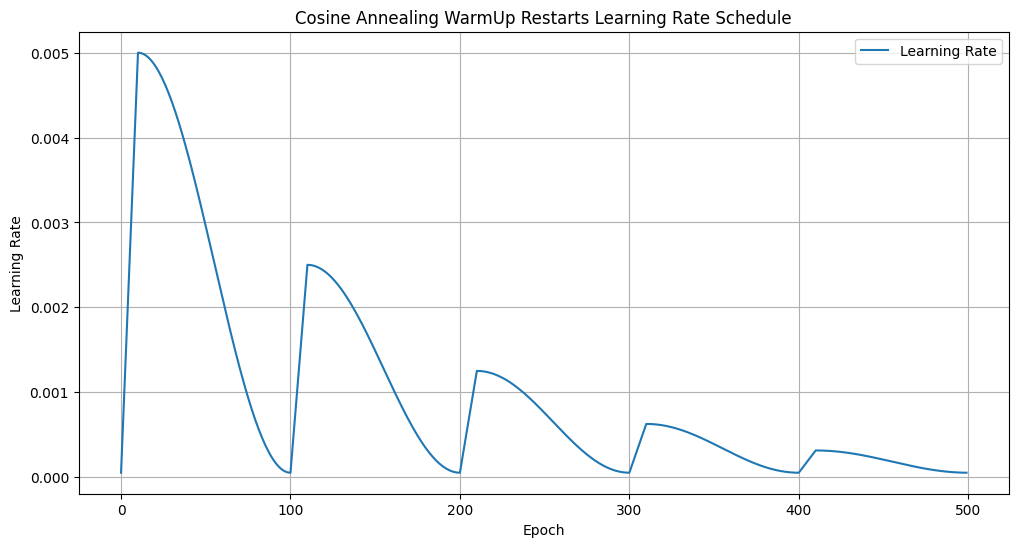

In [2]:
def visualize_lr_schedule(T_0, T_mult, eta_max, T_up, gamma, epochs):
    lr_scheduler = CosineAnnealingWarmUpRestarts(
        optimizer,
        T_0=T_0,
        T_mult=T_mult,
        eta_max=eta_max,
        T_up=T_up,
        gamma=gamma,
    )
    
    lrs = []
    for epoch in range(epochs):
        lr_scheduler.step(epoch)
        lrs.append(lr_scheduler.get_lr()[0])
    
    plt.figure(figsize=(12, 6))
    plt.plot(range(epochs), lrs, label='Learning Rate')
    plt.title('Cosine Annealing WarmUp Restarts Learning Rate Schedule')
    plt.xlabel('Epoch')
    plt.ylabel('Learning Rate')
    plt.grid(True)
    plt.legend()
    plt.show()

model = timm.create_model("resnet50", pretrained=True, num_classes=17)
optimizer=torch.optim.AdamW(params=model.parameters(), lr=0.00005)
visualize_lr_schedule(T_0=100, T_mult=1, eta_max=0.005, T_up=10, gamma=0.5, epochs=500)